# Backtesting Fire Rune Market Making Strategy

Yeah so I'm pretty sure there's a banger strategy here where you can make a shit ton of money.

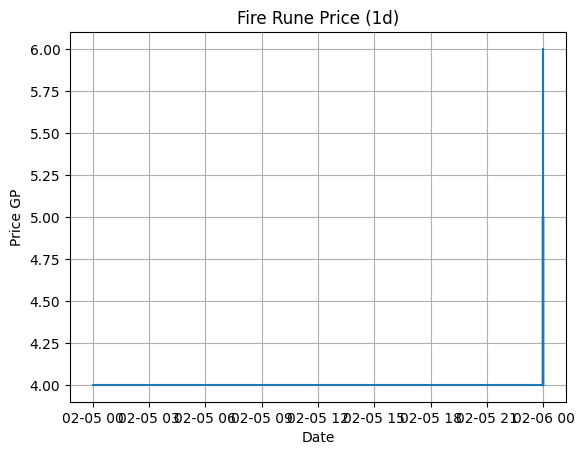

In [141]:
import requests
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from collections import defaultdict
from datetime import datetime

headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/111.0.0.0 Safari/537.36'}
base_url = "https://prices.runescape.wiki/api/v1/osrs/timeseries"

params = {
    "timestep": "5m",
    "id": "554" # Fire Rune
}

response = requests.get(base_url, params=params, headers=headers)
data = response.json()['data']

fire_rune = defaultdict(list)

for item in data:
    fire_rune['timestamp'].append(item['timestamp'])
    fire_rune['avgLowPrice'].append(item['avgLowPrice'])
    
fire_rune = pd.DataFrame(fire_rune)
fire_rune['timestamp'] = fire_rune['timestamp'].apply(datetime.fromtimestamp)
fire_rune['timestamp'] = fire_rune['timestamp'].apply(lambda x: x.date())

plt.plot(fire_rune['timestamp'], fire_rune['avgLowPrice'])
plt.xlabel('Date')
plt.ylabel('Price GP')
plt.grid(True)
plt.title('Fire Rune Price (1d)')
plt.show()

In [2]:
import warnings
warnings.filterwarnings('ignore')

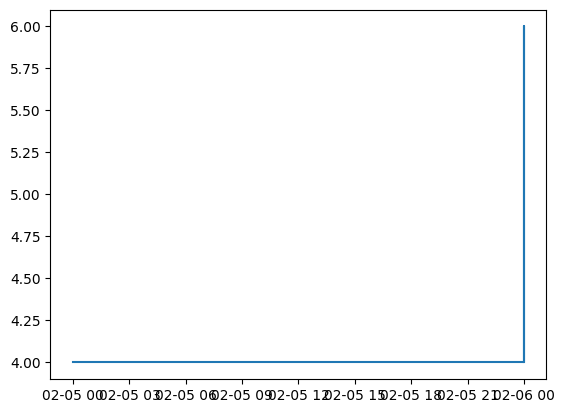

In [172]:
plt.plot(fire_rune.index, fire_rune['Low'])
plt.show()

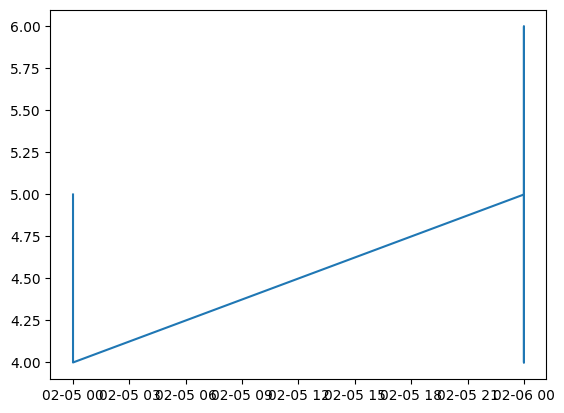

In [173]:
plt.plot(fire_rune.index, fire_rune['High'])
plt.show()

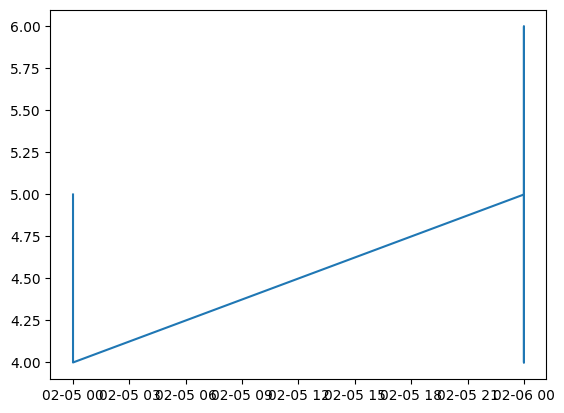

In [174]:
plt.plot(fire_rune.index, fire_rune['Close'])
plt.show()

In [170]:
class FireRuneStrat(Strategy):
    def init(self):
        pass
        
    def next(self):
        if self.data.Close[-1] < 5:
            self.buy()
    
        if self.data.Close[-1] > 5:
            self.sell()

In [175]:
fire_rune = defaultdict(list)
dates = []

for item in data:
    if item['avgLowPrice'] == "None" or item['avgLowPrice'] is None or item['avgHighPrice'] == "None" or item['avgHighPrice'] is None:
        continue
    dates.append(item['timestamp'])
    fire_rune['Low'].append(float(item['avgLowPrice']))
    fire_rune['Open'].append(float(item['avgLowPrice']))
    fire_rune['High'].append(float(item['avgHighPrice']))
    fire_rune['Close'].append(float(item['avgHighPrice']))

fire_rune = pd.DataFrame(fire_rune)
dates = [datetime.fromtimestamp(x).date() for x in dates]
fire_rune.index = dates
fire_rune.index = pd.to_datetime(fire_rune.index)
fire_rune.head()

,Low,Open,High,Close
2025-02-05,4.0,4.0,5.0,5.0
2025-02-05,4.0,4.0,4.0,4.0
2025-02-05,4.0,4.0,5.0,5.0
2025-02-05,4.0,4.0,5.0,5.0
2025-02-05,4.0,4.0,5.0,5.0


In [176]:
bt = Backtest(fire_rune, FireRuneStrat,
              cash=100000, commission=.002,
              exclusive_orders=True)
output = bt.run()
bt.plot()

ValueError: cannot reindex on an axis with duplicate labels

In [177]:
output

Start                     2025-02-05 00:00:00
End                       2025-02-06 00:00:00
Duration                      1 days 00:00:00
Exposure Time [%]                    99.35897
Equity Final [$]                    54405.728
Equity Peak [$]                      124750.4
Commissions [$]                     80054.224
Return [%]                          -45.59427
Buy & Hold Return [%]                     0.0
Return (Ann.) [%]                      -100.0
Volatility (Ann.) [%]                     NaN
CAGR [%]                               -100.0
Sharpe Ratio                              NaN
Sortino Ratio                        -0.28015
Calmar Ratio                         -1.49664
Max. Drawdown [%]                   -66.81623
Avg. Drawdown [%]                   -66.81623
Max. Drawdown Duration        1 days 00:00:00
Avg. Drawdown Duration        1 days 00:00:00
# Trades                                  309
Win Rate [%]                          4.53074
Best Trade [%]                    